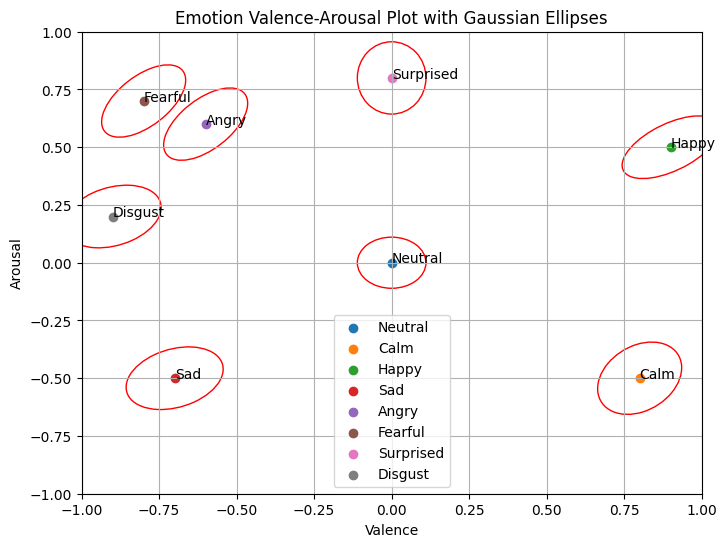

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# 感情とそれに対応する平均、分散、共分散
emotions = {
    "Neutral": {"mean": (0, 0), "var": (0.1, 0.1), "cov": 0},
    "Calm": {"mean": (0.8, -0.5), "var": (0.15, 0.2), "cov": 0.05},
    "Happy": {"mean": (0.9, 0.5), "var": (0.2, 0.15), "cov": 0.1},
    "Sad": {"mean": (-0.7, -0.5), "var": (0.2, 0.15), "cov": -0.05},
    "Angry": {"mean": (-0.6, 0.6), "var": (0.15, 0.2), "cov": 0.1},
    "Fearful": {"mean": (-0.8, 0.7), "var": (0.15, 0.2), "cov": 0.1},
    "Surprised": {"mean": (0, 0.8), "var": (0.1, 0.2), "cov": 0},
    "Disgust": {"mean": (-0.9, 0.2), "var": (0.2, 0.15), "cov": -0.05}
}

# グラフの作成
plt.figure(figsize=(8, 6))
ax = plt.gca()

for emotion, data in emotions.items():
    mean = data["mean"]
    var = data["var"]
    cov = data["cov"]

    # 楕円の描画
    lambda_, v = np.linalg.eig(np.array([[var[0], cov], [cov, var[1]]]))
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=mean, width=lambda_[0]*0.7, height=lambda_[1]*0.7, angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('red')
    ax.add_artist(ell)

    # 感情の平均位置に点をプロット
    plt.scatter(*mean, label=emotion)
    plt.text(mean[0], mean[1], emotion)

# 軸のラベル
plt.xlabel('Valence')
plt.ylabel('Arousal')

# グリッドの表示
plt.grid(True)

# 軸の範囲
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# タイトルの追加
plt.title('Emotion Valence-Arousal Plot with Gaussian Ellipses')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()


In [5]:
import os
import numpy as np

# 感情とそれに対応する平均、分散、共分散
emotions = {
    "01": {"mean": (0, 0), "var": (0.1, 0.1), "cov": 0},
    "02": {"mean": (0.8, -0.5), "var": (0.15, 0.2), "cov": 0.05},
    "03": {"mean": (0.9, 0.5), "var": (0.2, 0.15), "cov": 0.1},
    "04": {"mean": (-0.7, -0.5), "var": (0.2, 0.15), "cov": -0.05},
    "05": {"mean": (-0.6, 0.6), "var": (0.15, 0.2), "cov": 0.1},
    "06": {"mean": (-0.8, 0.7), "var": (0.15, 0.2), "cov": 0.1},
    "07": {"mean": (0, 0.8), "var": (0.1, 0.2), "cov": 0},
    "08": {"mean": (-0.9, 0.2), "var": (0.2, 0.15), "cov": -0.05}
}

def sample_emotion(emotion_code, num_samples=300):
    """ 指定された感情コードに基づいてサンプリングを行う """
    emotion = emotions[emotion_code]
    mean = emotion["mean"]
    cov_matrix = [[emotion["var"][0], emotion["cov"]], [emotion["cov"], emotion["var"][1]]]
    cov_matrix = np.array(cov_matrix) * 0.6  # 固有値を0.6に調整
    return np.random.multivariate_normal(mean, cov_matrix, num_samples)

def extract_emotion_from_filename(filename):
    """ ファイル名から感情コードを抽出する """
    return filename.split('-')[2]

# フォルダパス
input_folder = '/home/zhangzehang2/emotion/audio-txt4/Female'
output_folder = '/home/zhangzehang2/emotion/va-txt/Female'

# フォルダ内のすべてのtxtファイルを処理
for filename in os.listdir(input_folder):
    if filename.endswith('.txt'):
        emotion_code = extract_emotion_from_filename(filename)
        samples = sample_emotion(emotion_code)

        # サンプリングしたデータを新しいファイルに保存
        output_path = os.path.join(output_folder, filename)
        np.savetxt(output_path, samples, fmt='%.5f')

print("サンプリングと保存が完了しました。")

サンプリングと保存が完了しました。
